# Inset plots in Matplotlib

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import ascii

# For use of Latex in plot labels
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

In [2]:
%matplotlib notebook

In [3]:
data = ascii.read('cmd_data.txt')

# Method 1: using "axes"

<IPython.core.display.Javascript object>


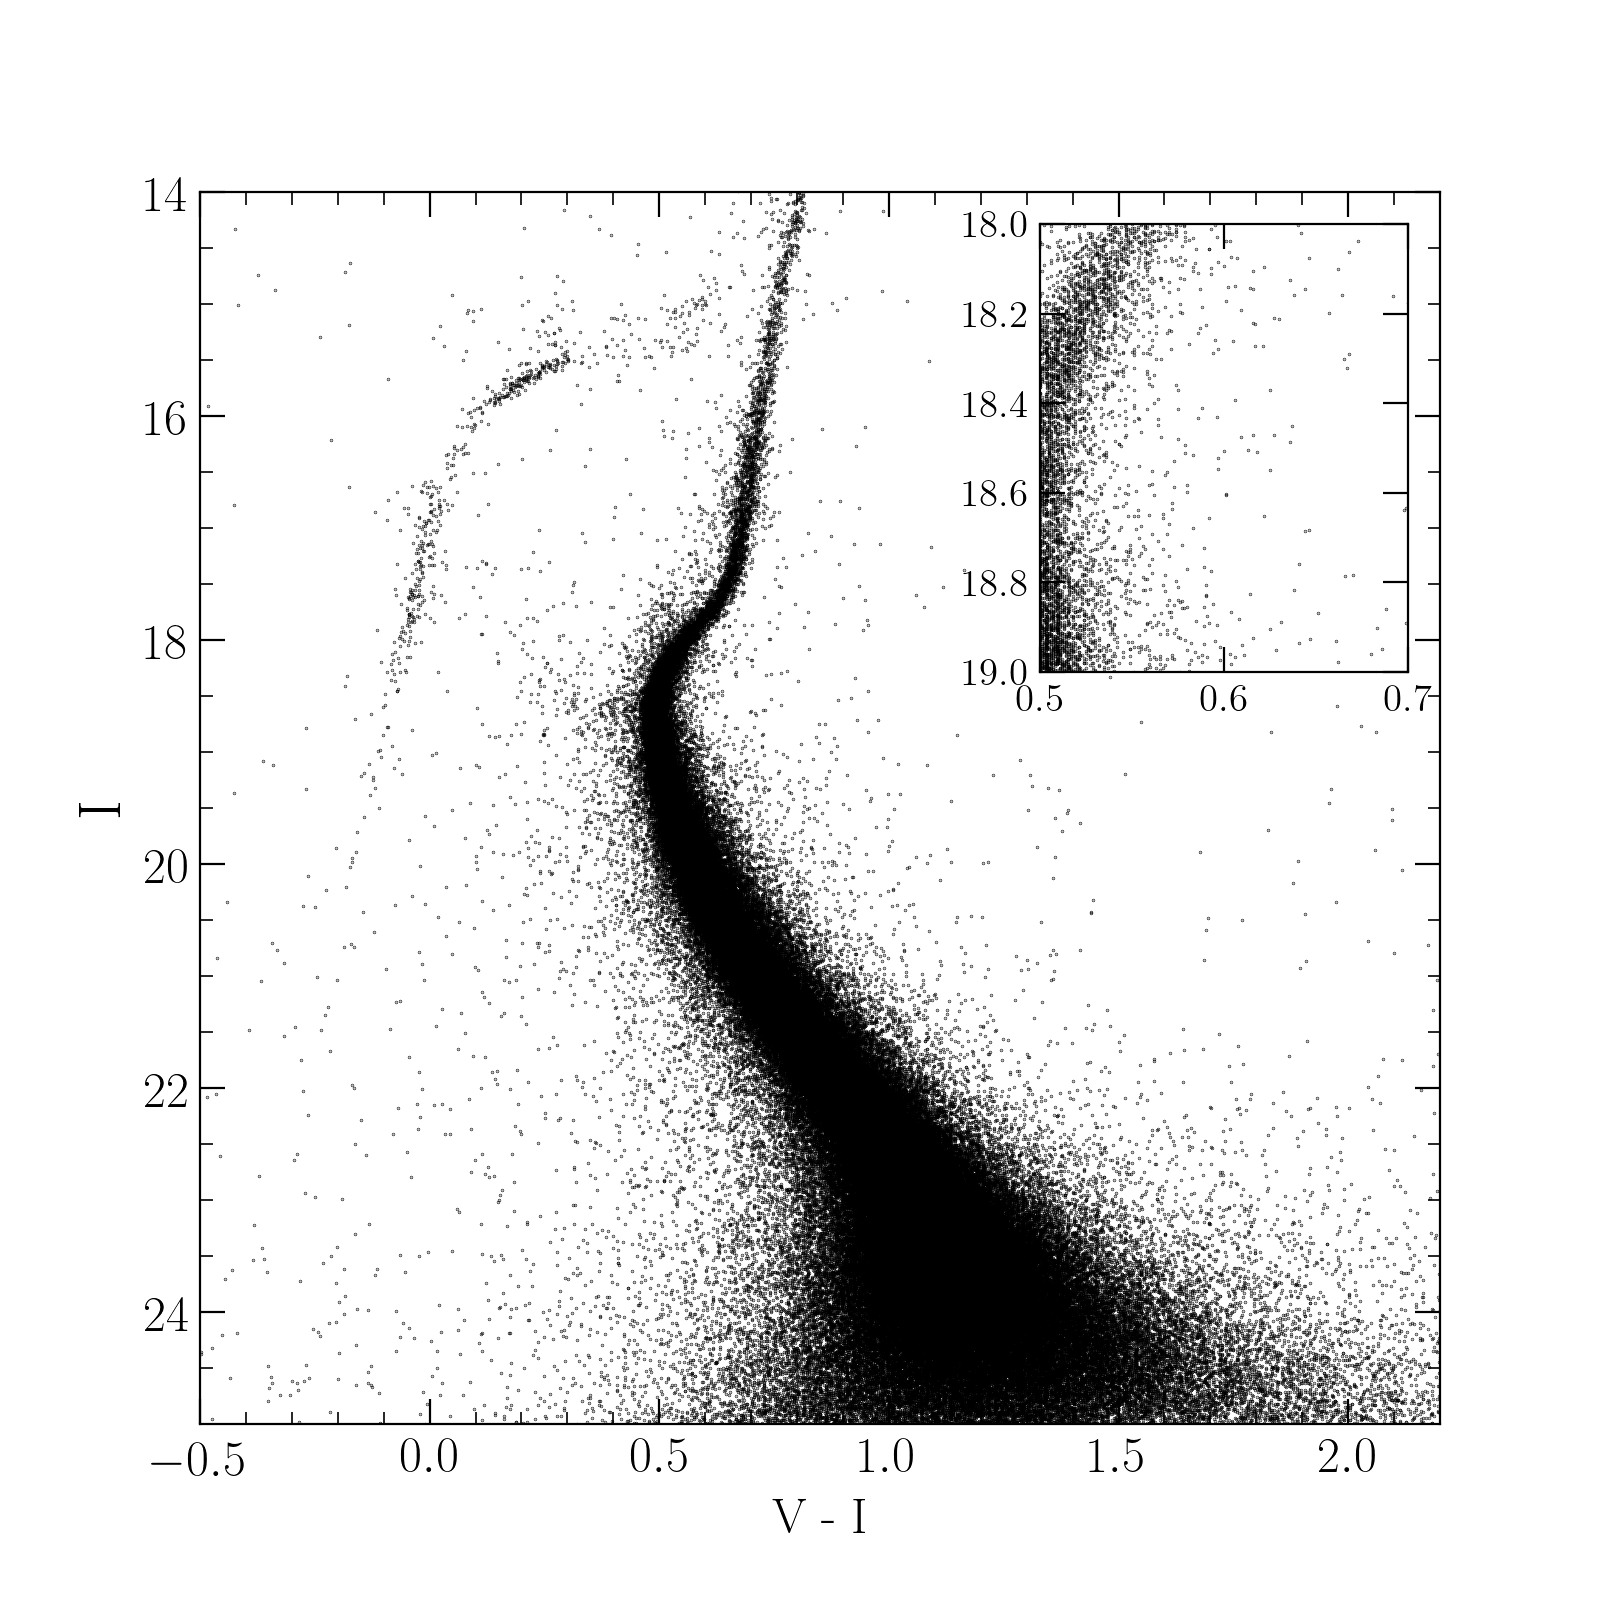

In [4]:
# 1- Main plot:
plt.figure(figsize= (8.0, 8.0))
plt.plot(data['VIvega'], data['Ivega'], 'ok', ms = 0.2, rasterized=True)
plt.xlabel('V - I', fontsize = 18)
plt.ylabel('I', fontsize = 22)
plt.gca().invert_yaxis()
plt.gca().set_xlim(-0.5,2.2)
plt.gca().set_ylim(25,14)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)

# 2- Add new axes:
ax2 = plt.axes([.65, .58, .23, .28])
# The numbers in the array respectively represent: 
# initial point in X 
# initial point in Y
# width of the subplot in X
# width of the subplot in Y 
# All numbers in fraction of the total length of axes

# 3- Now new subplot is initialized, plot like main plot:
plt.plot(data['VIvega'], data['Ivega'], 'ok', ms = 0.2, rasterized=True)
plt.gca().invert_yaxis()
plt.gca().set_xlim(0.5,0.7)
plt.gca().set_ylim(19,18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)
#plt.savefig('inset1.jpg',bbox_inches='tight',dpi=150)

# 3. Method 2: using mpl toolkits

<IPython.core.display.Javascript object>


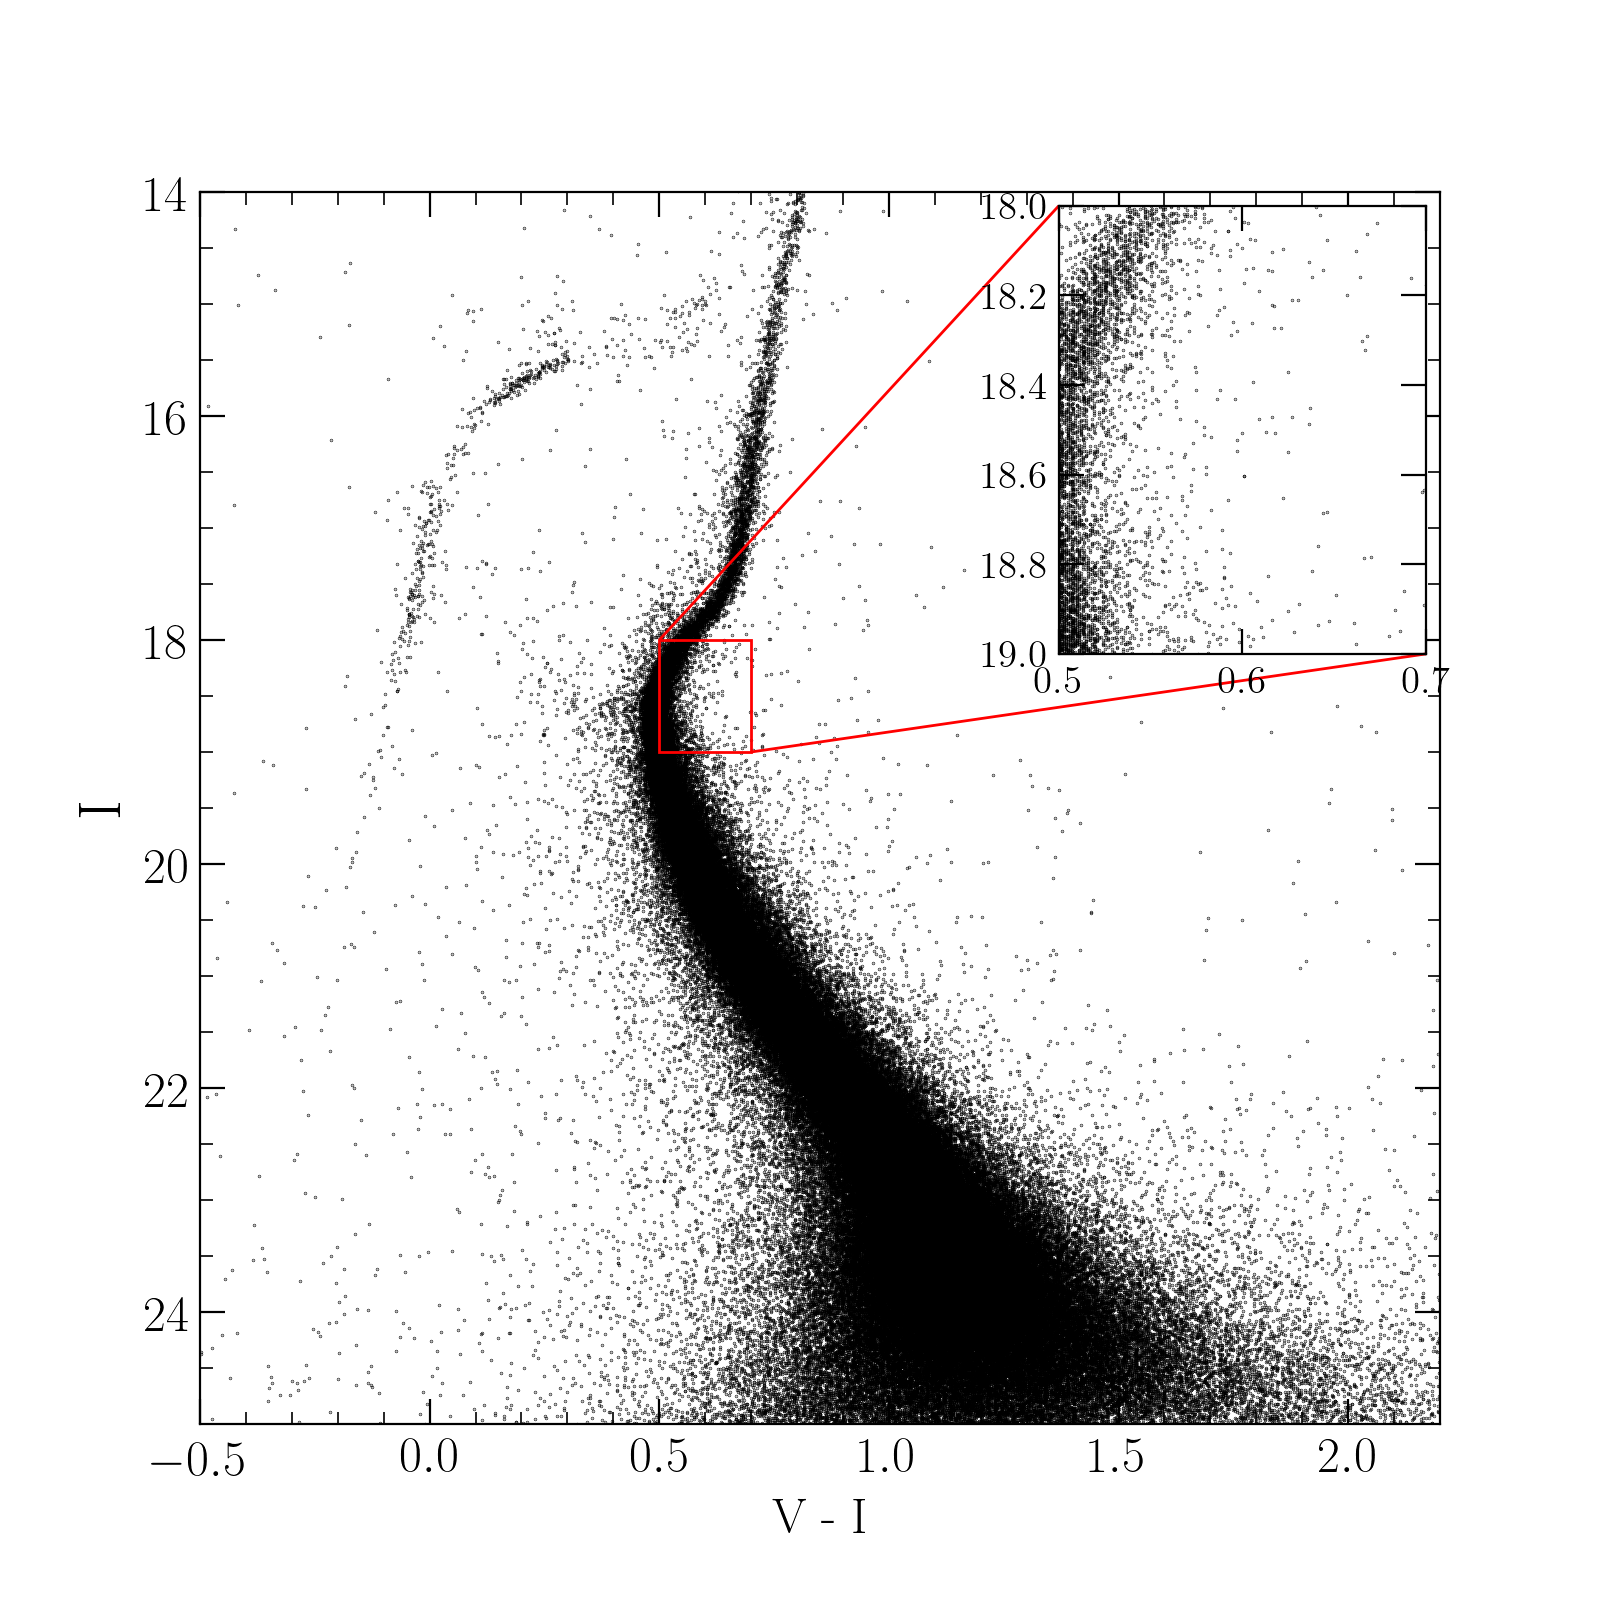

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# 1- Initialize a subplot at first:
fig, ax = plt.subplots(figsize=[8,8])

# 2- Main plot:
plt.plot(data['VIvega'], data['Ivega'], 'ok', ms = 0.2, rasterized=True,zorder=0)
plt.xlabel('V - I', fontsize = 18)
plt.ylabel('I', fontsize = 22)
plt.gca().set_xlim(-0.5,2.2)
plt.gca().set_ylim(14,25)
plt.gca().invert_yaxis()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)

# 3- initialize the zoomed-in plot:
axins = zoomed_inset_axes(ax, 4, loc=1) 
# ax refers to the main plot
# 4 is the size of the zoomed-in plot
# loc is the location over the plot

# 4- Let's plot the subplot:
plt.plot(data['VIvega'], data['Ivega'], 'ok', ms = 0.2, rasterized=True)
plt.ylim(19,18)
#plt.gca().invert_yaxis()
plt.xlim(0.5,0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)

# 5- Add the frames and lines to show where the zoomed-in plot is showing
patch, pp1,pp2 = mark_inset(ax, axins, loc1=1, loc2=1, fc='none', ec='r')
pp1.loc1 = 4
pp1.loc2 = 1
pp2.loc1 = 2
pp2.loc2 = 3

#plt.savefig('inset2.jpg',bbox_inches='tight',dpi=150)